In [66]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,\
DecisionTreeRegressor,plot_tree

# decision tree classification


In [28]:
from sklearn.datasets import load_iris

In [29]:
iris = load_iris()
X, y = iris.data, iris.target

In [32]:
data=pd.DataFrame(X,columns=iris.feature_names)
data["target"]=y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=0,
                                                    shuffle=True)

In [58]:
model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(0, 60, 10)},
                  cv=5,
                  n_jobs=4)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 3, 'min_samples_split': 10}
0.9481481481481481


In [59]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

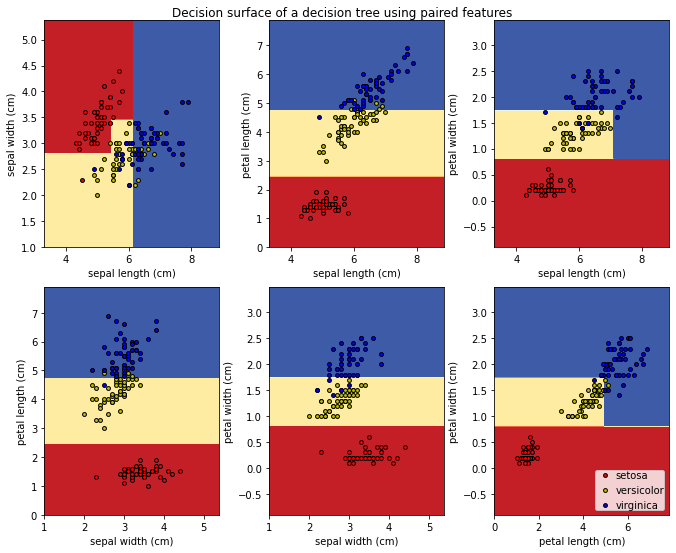

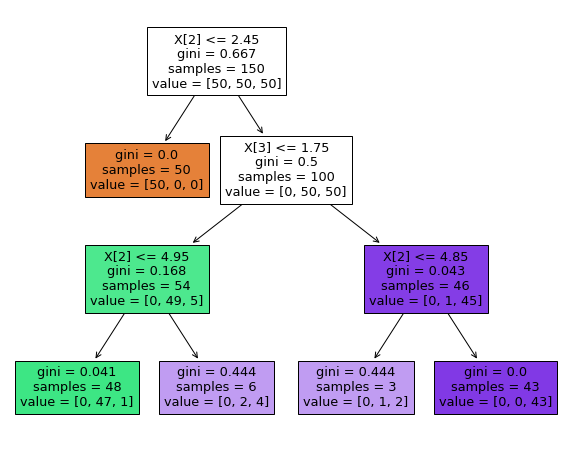

In [60]:
plt.figure(figsize=(10,8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier(max_depth=3,min_samples_split=10).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
                                                      
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(10,8))
clf = DecisionTreeClassifier(max_depth=3,min_samples_split=10).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


# decision tree regression


In [62]:
cali_housing=pd.read_csv("/Users/mohammedherrag/Downloads/cali_housing.csv",sep=',')
cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
cali_housing_1=cali_housing[["Longitude","MedHouseVal"]]
cali_housing_1.head()

,Longitude,MedHouseVal
0,-122.23,4.526
1,-122.22,3.585
2,-122.24,3.521
3,-122.25,3.413
4,-122.25,3.422


In [68]:
X = cali_housing_1[['Longitude']]
y = cali_housing_1['MedHouseVal'] 

<function matplotlib.pyplot.show(close=None, block=None)>

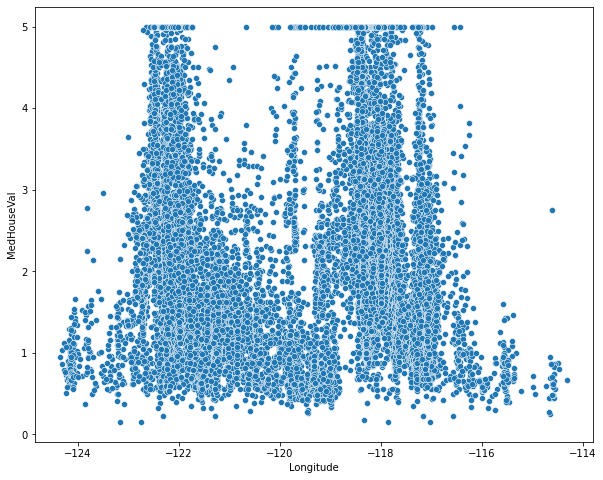

In [69]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=cali_housing_1['Longitude'],
                y=cali_housing_1['MedHouseVal'])
plt.show

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=0,
                                                    shuffle=True)

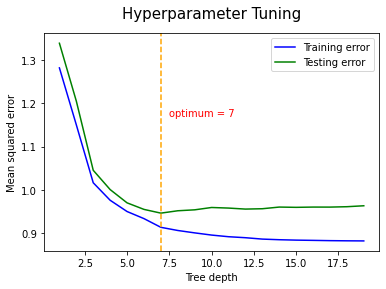

In [72]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))

testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()



In [74]:
tree_reg_opt1 = DecisionTreeRegressor(max_depth=7,
                             random_state=1)

In [76]:
tree_reg_opt1.fit(X,y)

DecisionTreeRegressor(max_depth=7, random_state=1)

In [77]:
tree_reg_opt1.score(X_test, y_test)

0.31988700487880506

/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


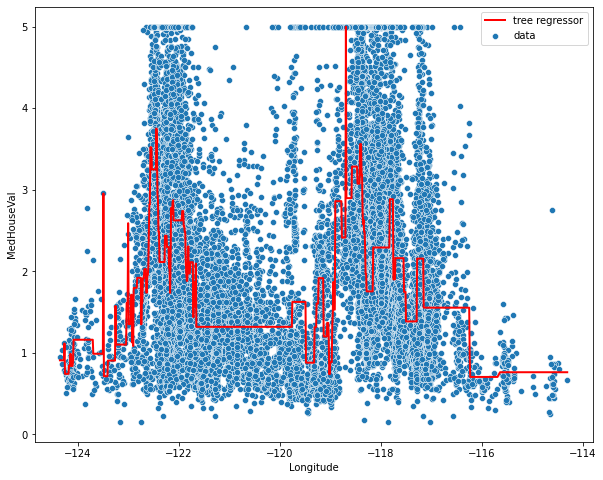

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(cali_housing_1['Longitude'],
                y=cali_housing_1['MedHouseVal'], label='data')
y_pred=tree_reg_opt1.predict(cali_housing_1['Longitude'].sort_values().to_frame())
plt.plot(cali_housing_1['Longitude'].sort_values(),y_pred,
        label="tree regressor",c='r',linewidth=2)
plt.legend()
plt.show()

In [79]:
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=4,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 50}
0.9363438182696402


/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


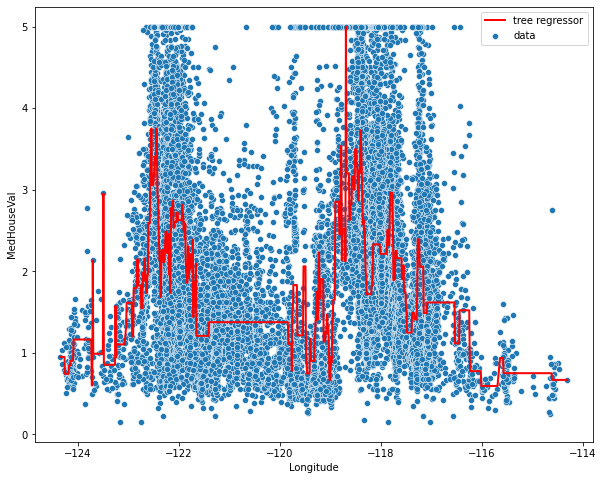

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(cali_housing_1['Longitude'],
                y=cali_housing_1['MedHouseVal'], label='data')
tree_reg_opt2=DecisionTreeRegressor(max_depth=9,min_samples_split=50)
tree_reg_opt2.fit(X, y)

y_pred=tree_reg_opt2.predict(cali_housing_1['Longitude'].sort_values().to_frame())
plt.plot(cali_housing_1['Longitude'].sort_values(),y_pred,
        label="tree regressor",c='r',linewidth=2)
plt.legend()
plt.show()